- **ID (integer):** Index of the dataset. Counting numbers starting at 0.
- **Gender (string):** Gender of the patient ("M" for male and "F" for female).
- **Age (integer):** Age of the patient in years.
- **Marital Status (string):** Description of the patient's marital status. No coding system enforced.
- **RIC (integer):** Rehabilitation Impairment Category assigned according to Appendix B in the Centers for Medicaid and Medicare Services IRF-PAI training manual.
- **Admission Total FIM Score:** Functional Independence Measure (FIM) score at the time of admission.
- **Discharge Total FIM Score:** FIM score at the time of discharge.

In [82]:
import pandas as pd
import numpy as np
from google.colab import files, drive  #had a very annoying bug requiring to import
import os

# drive.mount('/content/drive')
uploaded = files.upload() #sorry for making you upload the csv file, its the only way it was letting me upload
# print(os.listdir('/content/drive/MyDrive'))
file_path = "patient_data_to_clean.csv"  # Update this based on the uploaded file's name

if os.path.exists(file_path):
    data = pd.read_csv(file_path, index_col=0) #read dataset
    print("File loaded successfully.")
    print(data.head())
else:
    print(f"File not found at {file_path}. Please check the file location.")

# Check for missing values and data types
print("\nDataset Info:")
data.info()

# Display summary statistics for numerical columns
print("\nSummary Statistics:")
print(data.describe()) # (mean, min, max, etc. )


Saving patient_data_to_clean.csv to patient_data_to_clean (11).csv
File loaded successfully.
   Gender  Age Marital Status  RIC  Admission Total FIM Score  \
ID                                                              
0       M   80        Widowed    8                         40   
1       M   90       Divorced    1                         65   
2       M   53        Married    2                         67   
3       F   69        Married   15                         41   
4       F   80        Married    3                         66   

    Discharge Total FIM Score  
ID                             
0                          89  
1                          75  
2                          99  
3                          67  
4                          65  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 4555 entries, 0 to 4554
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 

In [87]:
#cleaning the marital status
def clean_marital_status(status):
    status = str(status).strip().lower() #convert to string, remove extra spaces, and make lowercase
    if status in ["married.", "married"]:
        return "Married"
    elif status in ["divorced", "divorced."]:
        return "Divorced"
    elif status in ["widowed", "widowed."]:
        return "Widowed"
    elif status in ["never married", "single"]:
        return "Never married"
    elif status == "separated":
        return "Separated"
    else:
        return None  #everything else returns NaN to represent the missing data

data['Marital Status'] = data['Marital Status'].apply(clean_marital_status)

#dictionary mapping numerical RIC values
ric_decoder = {1: "Stroke", 2: "TBI", 3: "NTBI", 4: "TSCI", 5: "NTSCI", 6: "Neuro", 7: "FracLE", 8: "ReplLE", 9: "Ortho", 10: "AMPLE", 11: "AMP-NLE", 12:
               "OsteoA", 13: "RheumA", 14: "Cardiac", 15: "Pulmonary", 16: "Pain", 17: "MMT-NBSCI", 18: "MMT-BSCI", 19: "GB", 20: "Misc", 21: "Burns"}
data['RIC'] = data['RIC'].map(ric_decoder)
print("Unmapped RIC values (NaN):", data['RIC'].isna().sum())

# Save the cleaned dataset to a new CSV file
cleaned_file_path = "/content/patient_data_cleaned.csv"
data.to_csv(cleaned_file_path) #write to file
print(f"File saved successfully at: {cleaned_file_path}") #debug



Unmapped RIC values (NaN): 4555
File saved successfully at: /content/patient_data_cleaned.csv


In [84]:
#load the cleaned dataset to be aggregation
# cleaned_file_path = "/content/patient_data_cleaned.csv"
# cleaned_file_path = "/content/drive/MyDrive/patient_data_cleaned.csv"
# Load the cleaned dataset for aggregation
cleaned_file_path = "/content/patient_data_cleaned.csv"
data = pd.read_csv(cleaned_file_path, index_col=0)

print("Unique values in RIC column:", data['RIC'].unique())
print("Value counts in RIC column:")
print(data['RIC'].value_counts())

# mode of the RIC column
most_common_ric_mode = data['RIC'].mode()
most_common_ric = most_common_ric_mode[0] if not most_common_ric_mode.empty else "No Data"

# aggregating the data as a dictionary {}
aggregation = {
    "patients_total": len(data),
    "males_total": len(data[data["Gender"] == "M"]),
    "females_total": len(data[data["Gender"] == "F"]),
    "married_total": len(data[data["Marital Status"] == "Married"]),
    "most_common_RIC": most_common_ric,
    "most_common_RIC_total": len(data[data["RIC"] == most_common_ric]) if most_common_ric != "No Data" else 0,
    "stroke_age_avg": data[data["RIC"] == "Stroke"]["Age"].mean(),
    "stroke_age_std": data[data["RIC"] == "Stroke"]["Age"].std(),
    "stroke_age_male_avg": data[(data["RIC"] == "Stroke") & (data["Gender"] == "M")]["Age"].mean(),
    "stroke_age_male_std": data[(data["RIC"] == "Stroke") & (data["Gender"] == "M")]["Age"].std(),
    "stroke_age_female_avg": data[(data["RIC"] == "Stroke") & (data["Gender"] == "F")]["Age"].mean(),
    "stroke_age_female_std": data[(data["RIC"] == "Stroke") & (data["Gender"] == "F")]["Age"].std(),
}

# aggregation dictionary to pandas Series for display
aggregation_series = pd.Series(aggregation)

print("Aggregation Results:")
print(aggregation_series)


Unique values in RIC column: ['ReplLE' 'Stroke' 'TBI' 'Pulmonary' 'NTBI' 'FracLE' 'AMPLE' 'NTSCI'
 'Misc' 'Ortho' 'Neuro' 'Cardiac' 'MMT-BSCI' 'GB' 'MMT-NBSCI' 'TSCI'
 'Pain' 'RheumA' 'OsteoA']
Value counts in RIC column:
RIC
Stroke       1169
ReplLE        698
Misc          357
Cardiac       319
FracLE        313
NTBI          275
Neuro         260
Ortho         253
TBI           241
NTSCI         162
MMT-NBSCI     144
TSCI          102
AMPLE          88
MMT-BSCI       77
Pulmonary      56
GB             29
Pain           10
RheumA          1
OsteoA          1
Name: count, dtype: int64
Aggregation Results:
patients_total                4555
males_total                   2242
females_total                 2313
married_total                 2244
most_common_RIC             Stroke
most_common_RIC_total         1169
stroke_age_avg           71.292558
stroke_age_std           14.340883
stroke_age_male_avg       70.07743
stroke_age_male_std      13.841474
stroke_age_female_avg    72.604982


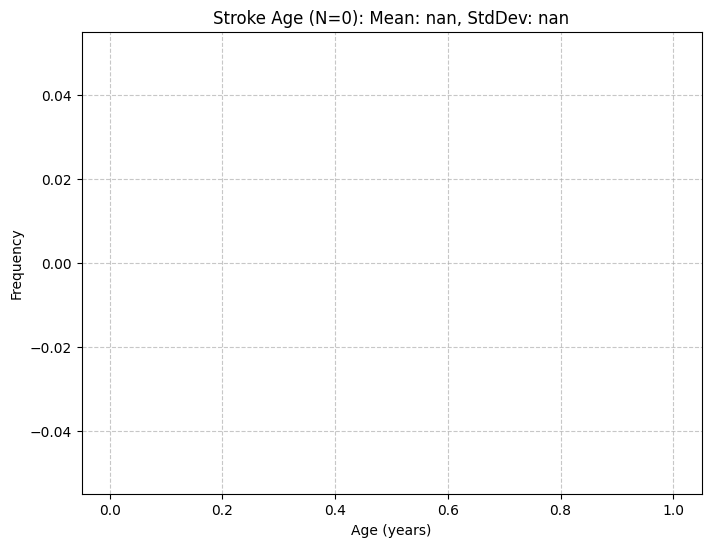

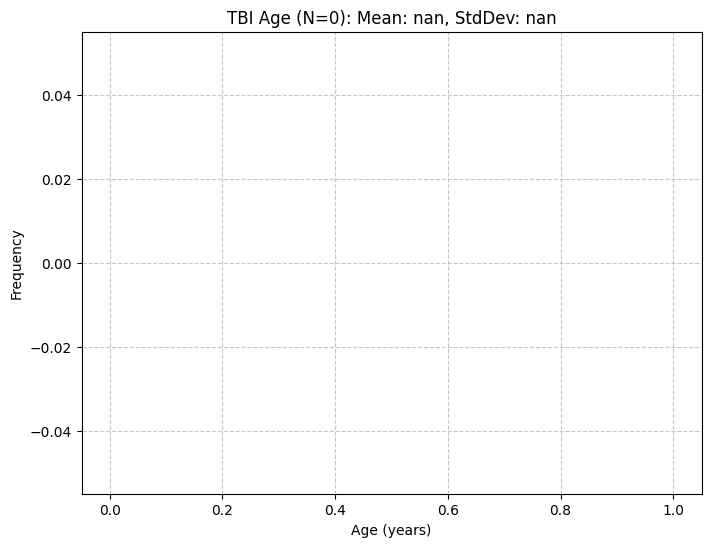

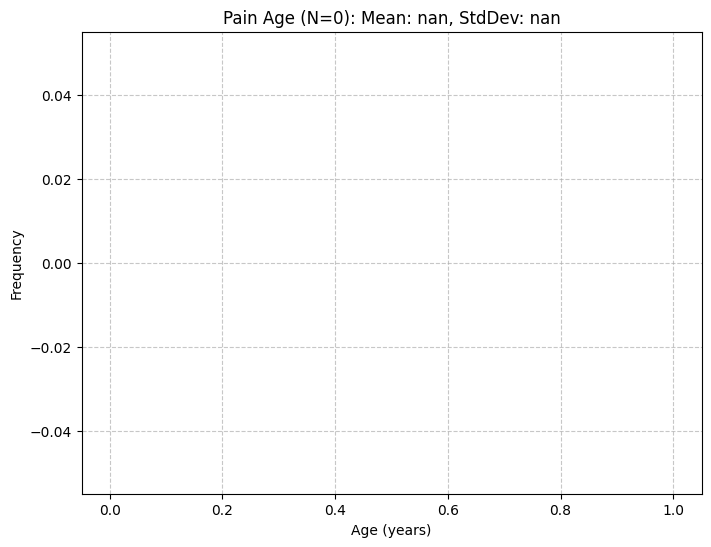

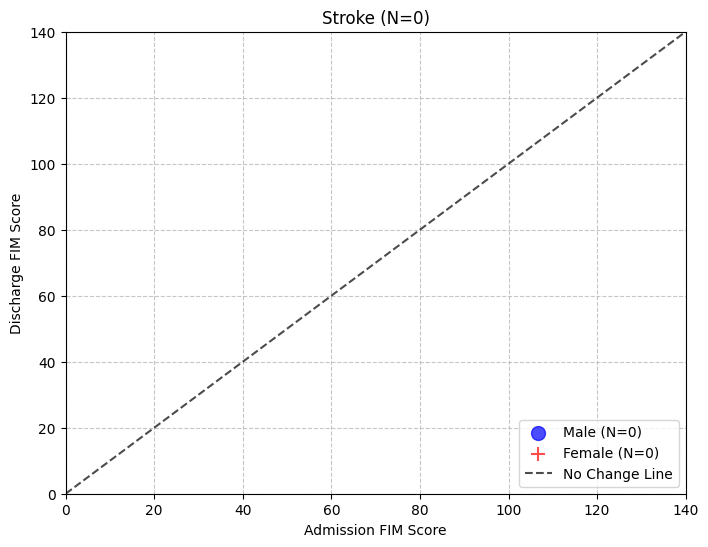

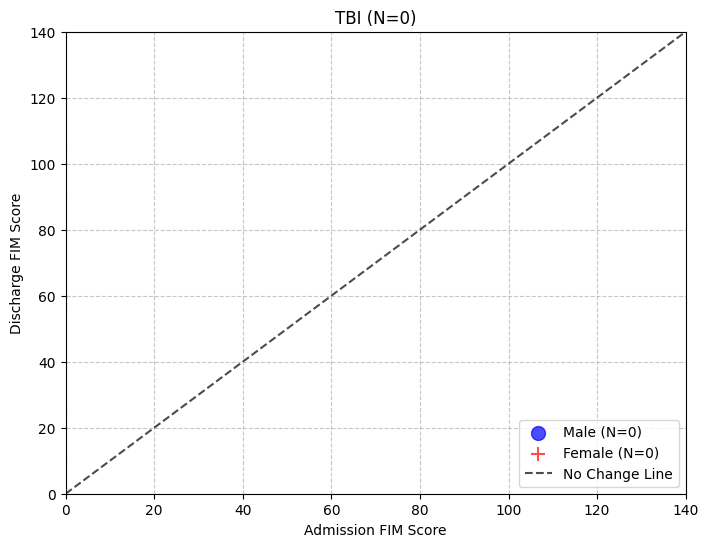

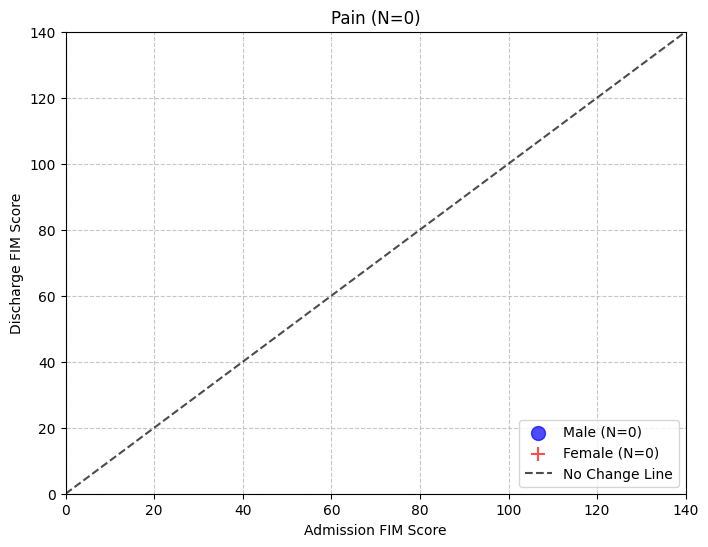

In [88]:
import matplotlib.pyplot as plt
import numpy as np

selected_rics = ["Stroke", "TBI", "Pain"]  #selected rics to visualize

filtered_data = data[data['RIC'].isin(selected_rics)] #filter for selected rics

#age distribution
for ric in selected_rics:
    ric_data = filtered_data[filtered_data['RIC'] == ric]
    mean_age = ric_data['Age'].mean()
    std_age = ric_data['Age'].std()

    plt.figure(figsize=(8, 6))
    plt.hist(ric_data['Age'], bins=30, color='green', alpha=0.7)
    plt.title(f"{ric} Age (N={len(ric_data)}): Mean: {mean_age:.2f}, StdDev: {std_age:.2f}")
    plt.xlabel("Age (years)")
    plt.ylabel("Frequency")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# scatter plots for admission vs discharge FIM scores
for ric in selected_rics:
  #get data and filter for males and females
    ric_data = filtered_data[filtered_data['RIC'] == ric]
    males = ric_data[ric_data['Gender'] == "M"]
    females = ric_data[ric_data['Gender'] == "F"]

    plt.figure(figsize=(8, 6))
    plt.scatter(males['Admission Total FIM Score'], males['Discharge Total FIM Score'],
                color='blue', label=f"Male (N={len(males)})", s=100, alpha=0.7)
    plt.scatter(females['Admission Total FIM Score'], females['Discharge Total FIM Score'],
                color='red', marker='+', label=f"Female (N={len(females)})", s=100, alpha=0.7)

    plt.plot([0, 140], [0, 140], 'k--', label="No Change Line", alpha=0.7)
    plt.xlim(0, 140)
    plt.ylim(0, 140)

    plt.title(f"{ric} (N={len(ric_data)})")
    plt.xlabel("Admission FIM Score")
    plt.ylabel("Discharge FIM Score")
    plt.legend(loc="lower right")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()


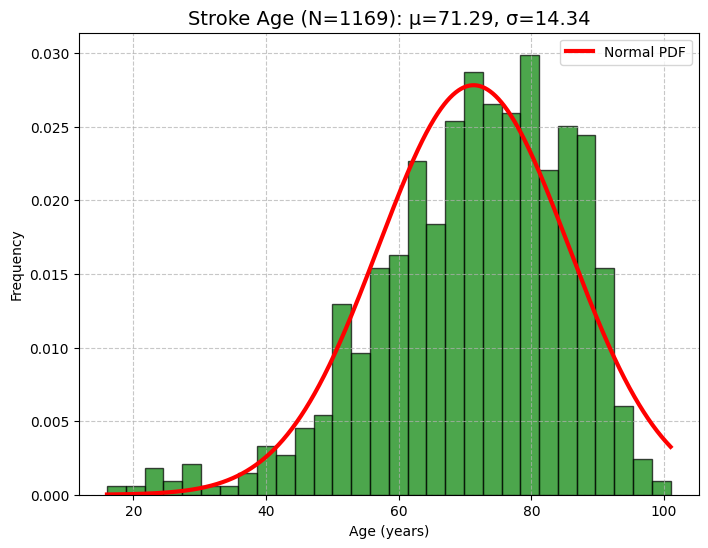

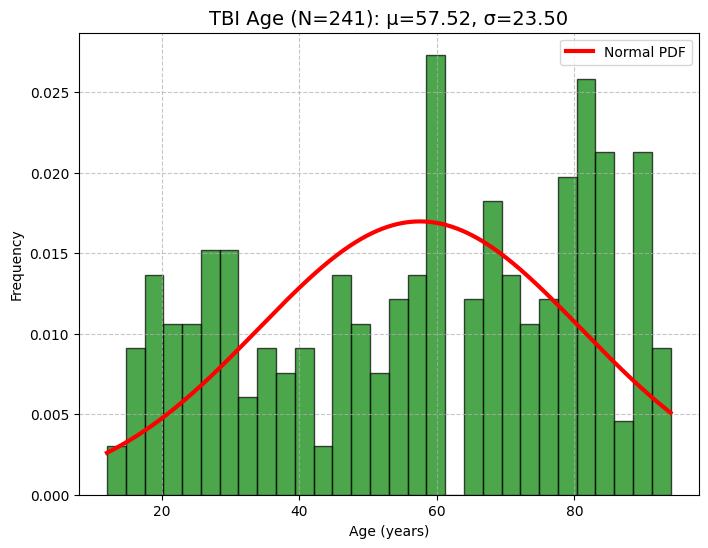

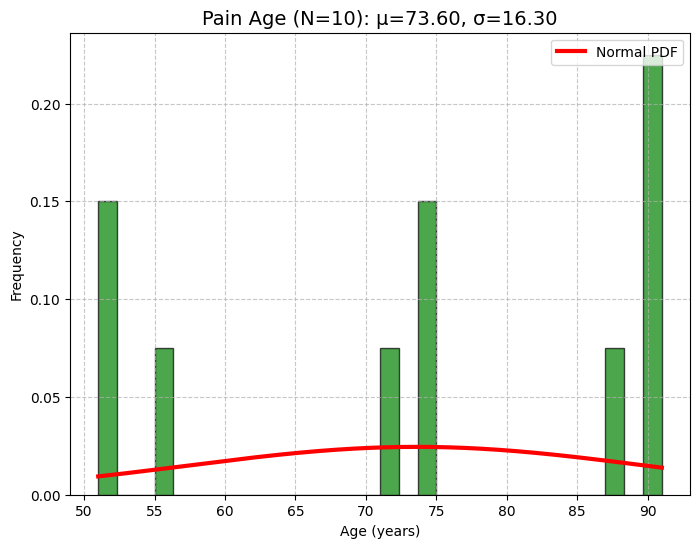

In [86]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# choose RIC categories for visualization (menu?)
selected_rics = ["Stroke", "TBI", "Pain"]

for ric in selected_rics:
    ric_data = data[data['RIC'] == ric]

    mean_age = ric_data['Age'].mean()
    std_age = ric_data['Age'].std()

    plt.figure(figsize=(8, 6))
    plt.hist(ric_data['Age'], bins=30, color='green', alpha=0.7, density=True, edgecolor='black')

    age_range = np.linspace(ric_data['Age'].min(), ric_data['Age'].max(), 1000)
    pdf = norm.pdf(age_range, mean_age, std_age)
    plt.plot(age_range, pdf, color='red', linewidth=3, label="Normal PDF")

    plt.title(f"{ric} Age (N={len(ric_data)}): μ={mean_age:.2f}, σ={std_age:.2f}", fontsize=14)
    plt.xlabel("Age (years)")
    plt.ylabel("Frequency")
    plt.legend(loc="upper right")
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.show()
